In [1]:
def reproduceResult():
  seed_value= 0

  
  with tf.device("/gpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

  


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os 
import numpy as np
import tensorflow as tf
import random as rn
from tensorflow import keras

reproduceResult()
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.test.gpu_device_name()
# from scipy import integrate
# import os
# import numpy as np
# from tensorflow import keras
import tempfile
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K


from tensorflow.keras import callbacks

from keras_lr_finder import LRFinder
from clr.clr_callback import CyclicLR

import tensorflow_model_optimization as tfmot

import tqdm

import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from attention import Attention

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from keras.preprocessing.text import Tokenizer


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

from bnlp import SentencepieceTokenizer
import gensim
import fasttext 

C:\Users\moshi\AppData\Local\Temp\ipykernel_7588\2832172220.py:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
df = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/UBMEC/Dataset/ubmec_clean.xlsx')

In [4]:
df.head

<bound method NDFrame.head of                                                     text   classes
0      এই নাটকটি হচ্ছে এই সালের। কিন্তু তখন ইউটিউবে ছ...       joy
1       ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ...  surprise
2       " বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক " " কোথ...       joy
3       এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সাল...       joy
4       কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দ...  surprise
...                                                  ...       ...
13431   Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম ...       joy
13432   কি যে করেন না করা স্যার? মৃত্যুকে পরে ভাবছি ব...       joy
13433   আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনা...       joy
13434         এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।        joy
13435   দুর্নীতি মুক্ত হলে নিশ্চয় দুর্নীতি মুক্ত হবে ...       joy

[13436 rows x 2 columns]>

In [5]:
df.isnull()

,text,classes
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
13431,False,False
13432,False,False
13433,False,False
13434,False,False


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [7]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [8]:
df['text'] = df['text'].apply(clean_text)

In [9]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df['text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
0000000             0.000036
03                  0.000024
11                  0.000027
1101826526522067    0.000028
12                  0.000011
                      ...   
ৰথম                 0.000032
ৰৱ                  0.000040
ৱচ                  0.000032
ৱৱৱ                 0.000041
৷কর                 0.000040
Length: 1979, dtype: float64


In [10]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

In [11]:
df['text'] = df['text'].apply(remove_less_important_words)

In [12]:
df.dropna(inplace=True)

In [13]:
df.groupby("classes").describe()

text                                                               
         count unique                                                top freq
classes                                                                      
anger     2480   2433                                          বিচার চাই    5
disgust   2079   2042  এর পরে কোনো গাড়ি খেয়ে দিলেই সব সরকারের দোষ প...    3
fear      1361   1349  এই দ্রবনে করোনার ভাইরাস মরে কিনা সেটা জানার জন...    2
joy       3467   3286                                            ধন্যবাদ   28
sadness   2683   2625  অপরাধ অপরাধ এবং অপরাধী কে কারী এবং দুজনেই সমান...   12
surprise  1366   1341  কিছুক্ষণ আগে লক্ষ্য করলাম কিছু মানুষ বাঙলাদেশে...    4

In [14]:
df["classes"].value_counts()

joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: classes, dtype: int64

In [15]:
df['text'] = df['text'].astype(str)

In [16]:
train, test = train_test_split(df, test_size=0.2, stratify = df["classes"], random_state = 42)
num_classes = 6
embed_num_dims = 300
max_seq_len = 50

x_train = train['text']
x_test = test['text']

y_train = train['classes']
y_test = test['classes']

texts_train = x_train
texts_test = x_test

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['text'])

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len, padding='pre' )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len,  padding='pre')

print(X_train_pad)


encoding = {
    "joy":0,
    "disgust":1,
    "sadness":2,
    "anger":3,
    "fear":4,
    "surprise":5
}

y_train = [encoding[x] for x in train['classes']]
y_test = [encoding[x] for x in test['classes']]



y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Number of unique words: 29279
[[    0     0     0 ...   242   489   112]
 [    0     0     0 ...  2060    41   459]
 [    0     0     0 ...   362    45 12801]
 ...
 [    0     0     0 ...    19    85  4544]
 [    0     0     0 ...    15    20   684]
 [    0     0     0 ...  2654 29279    42]]


In [17]:
# META EMBADDING

In [18]:
def create_embedding_matrix(word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open('F:/Python_code/embedding/glove.840B.300d.txt', encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                try:
                    idx = word_index[word]
                    embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
                except ValueError:
                    pass
    return embedding_matrix

embedd_matrix_glove = create_embedding_matrix(index_of_words, embed_num_dims)
print(embedd_matrix_glove.shape)

(29280, 300)


# Random Search

In [19]:
from tensorflow.keras import regularizers
import time
LOG_DIR = f"{int(time.time())}"
seed_value= 0



def build_model(hp):
  
  reproduceResult()

  print('Ya it comes here')
  fake_val = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_unit = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_dropout = hp.Float("cnn_1_dropout",min_value = 0.1,max_value = 0.3,step = 0.1)

  lstm_unit = hp.Int("lstm_unit",min_value =64, max_value = 256, step = 32)
  lstm_dropout = hp.Float("lstm_dropout",min_value = 0.1,max_value = 0.5,step = 0.1)




  seq_input = keras.layers.Input(shape=(max_seq_len,))

  embedded = keras.layers.Embedding(vocab_size,
                          embed_num_dims,
                          input_length = max_seq_len,
                          weights = [embedd_matrix_glove])(seq_input)


  lstm = keras.layers.Bidirectional(keras.layers.LSTM(lstm_unit, recurrent_regularizer=regularizers.l2(1e-4),
                                                      return_sequences=True,kernel_regularizer=regularizers.l2(1e-4),
                                                      bias_regularizer=regularizers.l2(1e-2),
                                                      activity_regularizer=regularizers.l2(1e-4),input_shape =(48,)))(embedded)
  lstm = keras.layers.Activation(activation='relu')(lstm)
  lstm = keras.layers.BatchNormalization()(lstm)
  lstm = keras.layers.Dropout(lstm_dropout,seed=seed_value)(lstm)
  
  
  max_pooling = keras.layers.GlobalMaxPooling1D()(lstm)
  output = keras.layers.Dense(num_classes, activation='softmax')(max_pooling)

  model = keras.Model(inputs = [seq_input], outputs = output)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model


stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=5,
                              restore_best_weights=True,
                              verbose=0, mode='max')


clr_step_size = int((len(X_train_pad)/64))
base_lr = 1e-3
max_lr = 6e-3
mode = 'exp_range'


clr = CyclicLR(base_lr = base_lr, max_lr = max_lr, step_size = clr_step_size, mode = mode)


tuner = RandomSearch(
    build_model,
    objective = keras_tuner.Objective('val_accuracy', direction="max"),
    max_trials = 30,
    executions_per_trial = 1,
    directory = LOG_DIR
    )
  
tuner.search(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))


tuner.results_summary()

Trial 30 Complete [00h 00m 32s]
val_accuracy: 0.4906994104385376

Best val_accuracy So Far: 0.5104166865348816
Total elapsed time: 00h 17m 22s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1708179266\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 26 summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.2
lstm_unit: 160
lstm_dropout: 0.2
Score: 0.5104166865348816

Trial 08 summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout: 0.1
lstm_unit: 96
lstm_dropout: 0.4
Score: 0.5093005895614624

Trial 14 summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.2
lstm_unit: 96
lstm_dropout: 0.5
Score: 0.5048363208770752

Trial 19 summary
Hyperparameters:
cnn_1_unit: 80
cnn_1_dropout: 0.1
lstm_unit: 64
lstm_dropout: 0.30000000000000004
Score: 0.5029761791229248

Trial 04 summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout: 0.2
lstm_unit: 64
lstm_dropout: 0.1
Score: 0.4977678656578064

Trial 05 summary
Hyperparameters:
cnn_1_

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_1_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
cnn_1_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
lstm_unit (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
lstm_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [21]:
#get best hypoerparamter
best_hps = tuner.get_best_hyperparameters()[0]
model = build_model(best_hps)

Ya it comes here


In [22]:
history = model.fit(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))

Epoch 1/30
168/168 [==============================] - 7s 26ms/step - loss: 3.8147 - accuracy: 0.4333 - val_loss: 2.6114 - val_accuracy: 0.4219
Epoch 2/30
168/168 [==============================] - 4s 22ms/step - loss: 1.1974 - accuracy: 0.7469 - val_loss: 1.7447 - val_accuracy: 0.4948
Epoch 3/30
168/168 [==============================] - 4s 22ms/step - loss: 0.3924 - accuracy: 0.9332 - val_loss: 1.6524 - val_accuracy: 0.4338
Epoch 4/30
168/168 [==============================] - 4s 22ms/step - loss: 0.3888 - accuracy: 0.9159 - val_loss: 1.9228 - val_accuracy: 0.4669
Epoch 5/30
168/168 [==============================] - 4s 22ms/step - loss: 0.1865 - accuracy: 0.9767 - val_loss: 2.7992 - val_accuracy: 0.4293
Epoch 6/30
168/168 [==============================] - 4s 22ms/step - loss: 0.2512 - accuracy: 0.9576 - val_loss: 2.6576 - val_accuracy: 0.4706
Epoch 7/30
168/168 [==============================] - 4s 22ms/step - loss: 0.1684 - accuracy: 0.9789 - val_loss: 3.3755 - val_accuracy: 0.4416

In [23]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

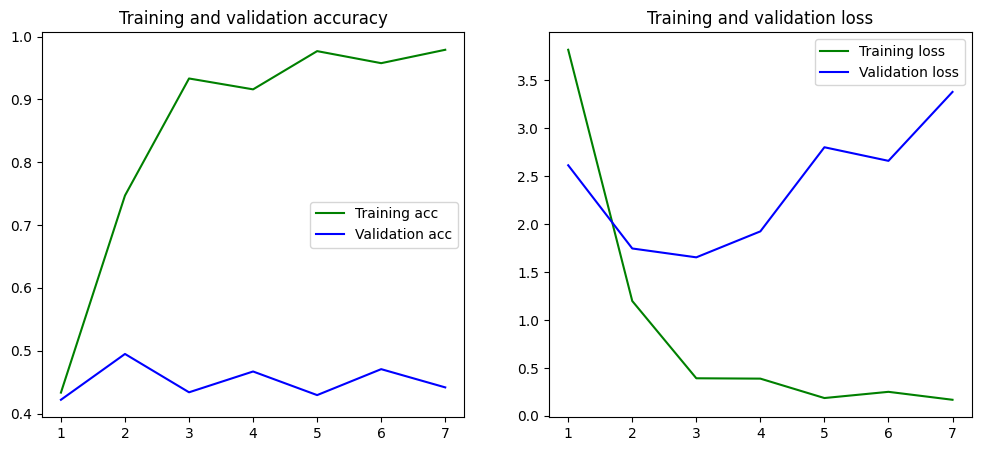

In [24]:
PlotGraph(history)

In [25]:
predict = model.predict(X_test_pad)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

84/84 [==============================] - 1s 5ms/step


array([0, 1, 3, ..., 2, 2, 3], dtype=int64)

In [26]:
predict_lables=np.argmax(y_test, axis=1)
predict_lables

array([4, 3, 0, ..., 2, 2, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict_lables, predict_class)
cm

array([[527,  19, 111,  18,  10,   9],
       [ 70, 109, 148,  71,   8,  10],
       [ 98,  47, 337,  38,   8,   9],
       [ 74,  66, 156, 186,   7,   7],
       [ 30,   9,  98,  13, 109,  13],
       [ 69,  19,  96,  19,   8,  62]], dtype=int64)

In [28]:
class_names = list(encoding.keys())

In [29]:
print(class_names)

['joy', 'disgust', 'sadness', 'anger', 'fear', 'surprise']


<Axes: >

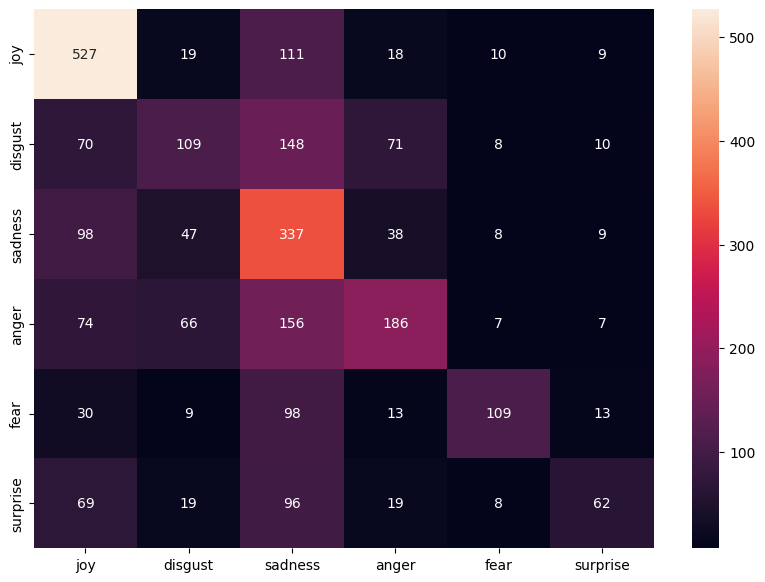

In [30]:
df_cm = pd.DataFrame(cm, index=class_names,columns=class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [31]:
from sklearn.metrics import classification_report
print(classification_report(predict_lables, predict_class, target_names =class_names))

              precision    recall  f1-score   support

         joy       0.61      0.76      0.67       694
     disgust       0.41      0.26      0.32       416
     sadness       0.36      0.63      0.45       537
       anger       0.54      0.38      0.44       496
        fear       0.73      0.40      0.52       272
    surprise       0.56      0.23      0.32       273

    accuracy                           0.49      2688
   macro avg       0.53      0.44      0.46      2688
weighted avg       0.52      0.49      0.48      2688

